<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Héctor Daniel Chávez Orozco.

**Fecha:** 08 de marzo del 2021

**Expediente** : 713442 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clases 10
**Link al repositorio en Github**: https://github.com/danielch4/Tarea_5-6_HDChavez

## <font color ='red'> **NOTA**  

####  <font color ='red'> Profe, mi compañera de equipo nunca me contestó para realizar la tarea en equipo, es por esto que solo está mi parte ya que lo hice yo solo.  

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math
import scipy.special as sps 
from math import factorial as fac
from scipy.stats import beta
import warnings
warnings.filterwarnings("ignore")

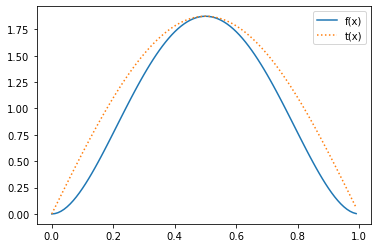

In [3]:
#Punto 1
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) # Encontrar el max
# Función t 
t = lambda x: max_f*np.sin(np.pi*x)
x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),":",label='t(x)')
plt.legend(loc="best")
plt.show()

### Punto 2
Tenemos 
>$ t(x) = a \cdot \sin(\pi x) $

Donde debe ser integrada en el intervalo [0,1]

$ c=\int_{0}^{1} t(x) dx  $

$ c= \int_{0}^{1} a \cdot \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$

Por lo tanto $g(x)$
>$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} =  \frac{\pi \sin(\pi x)}{2}$

### Punto 3

$g(x)=\sin(\pi x)$

Sacamos la integral

$\int_{0}^{x} sin(\pi y) \ dy = -\displaystyle\frac{1}{\pi} cos(\pi y)  |_0^x = -\frac{1}{\pi} cos(\pi x) + \frac{1}{\pi}$

Igualamos a U

$U= -\frac{1}{\pi} cos(\pi x) + \frac{1}{\pi}$


$U= \frac{1}{\pi}(- cos(\pi x) + 1)$

$\pi U= - cos(\pi x) + 1$


$cos(\pi x) = 1 - \pi U$

Por lo tanto x es:

> $x = \frac{1}{\pi} \arccos{(1- \pi U)} $

In [4]:
# Punto 4

# Código de solución 

N=10000
def trans_g(arccos,N):
    y = (1/np.pi)*np.arccos((2*np.random.uniform(-np.pi/2,np.pi/2,N))/np.pi)
    
    return y

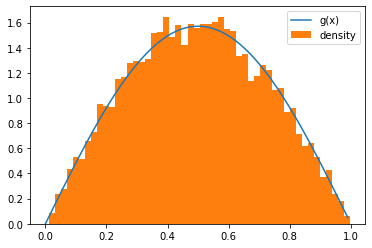

[1.875]


In [5]:
N = 10000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = trans_g(a,N)
plt.plot(x,g(x),label='g(x)')
plt.hist(R1,bins = 50, density = True, label='density')
plt.legend()
plt.show()
print(a)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

In [6]:
#Punto 5

def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


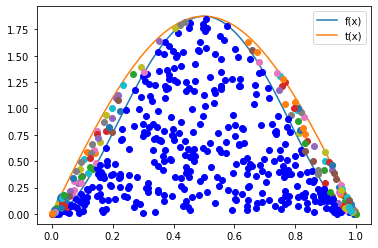

In [7]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [8]:
#Punto 6
def Acep_rechazoS(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    c=np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    c = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return c

In [9]:
Aceptacion_Senoidal = Acep_rechazoS(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas un pulso senoidal es:',Aceptacion_Senoidal*100,'%')

El porcentaje de puntos aceptados cuando usas un pulso senoidal es: 70.19999999999999 %


In [10]:
# C como constante
f = lambda x:30*(x**2-2*x**3+x**4)
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a*np.ones(len(x))

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

In [11]:
Aceptacion_Const= Acep_rechazoS(R2,R1,f,t)/len(R1)
print('El porcentaje de puntos aceptados cuando usas constante es:',Aceptacion_Const*100,'%')

El porcentaje de puntos aceptados cuando usas constante es: 53.2 %


El máximo de f es: [1.875]


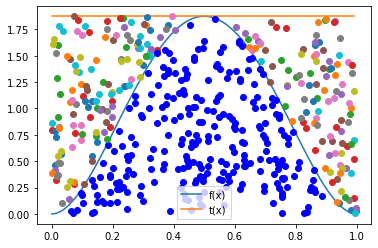

In [12]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()


N = 500 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

quantity_const = Acep_rechazo(R2,R1,f,t)

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de la función es: 2.109375


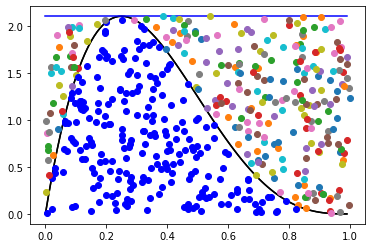

In [13]:
#Punto 7

# Parámetros de la función beta
a =10; b=3
N = 500  # número de puntos
# Función objetivo
f = lambda x: 20*x*(1-x)**3
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
# Encuentro el máximo de la función f
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)

t = lambda x: c*np.ones(len(x))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

plt.show()


In [14]:
def trans_g(arccos,N):
    y = (1/np.pi)*np.arccos((1 - np.random.uniform(0,1,N)*np.pi))   
    return y

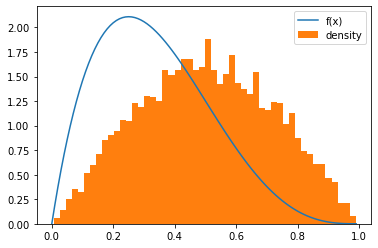

[2.109375]


In [15]:
N = 10000
f = lambda x: 20*x*(1-x)**3
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: 20*x*(1-x)**3
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = trans_g(a,N)
plt.plot(x,f(x),label='f(x)')
plt.hist(R1,bins = 50, density = True, label='density')
plt.legend()
plt.show()
print(a)

In [16]:
np.random.uniform(0,5,N)

array([2.40605451, 3.36034163, 1.67260685, ..., 0.93904637, 1.93599993,
       4.91554207])

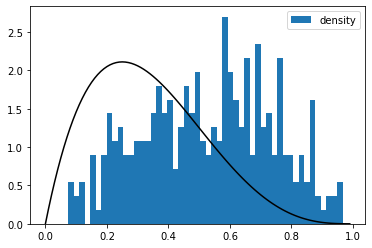

El máximo de la función es: 2.109375


In [17]:
# Parámetros de la función beta
a =10; b=3
N = 500  # número de puntos
# Función objetivo
f = lambda x: 20*x*(1-x)**3
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
# Encuentro el máximo de la función f

t = t = lambda x: max_f*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
R1 = trans_g(a,N)

plt.hist(R1,bins = 50, density = True, label='density')
plt.legend()
plt.show()
print('El máximo de la función es:',c)



8. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [18]:
#Punto 8

def Poisson(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

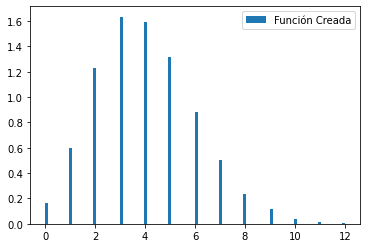

In [19]:
n = 12; l = 4; N = 10**4

p_acum = Poisson(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='Función Creada')
plt.legend()


